<a href="https://colab.research.google.com/github/NguyenHNhan/NguyenHNhan.gifhub.io/blob/main/Grocery_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
import numpy as np
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
df = pd.read_csv('/content/drive/MyDrive/KPDL/T8/Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [168]:
transactions = list(df.groupby(by=['Member_number', 'Date'])['itemDescription'].apply(list))
transactions[:5]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables']]

In [169]:
trans_encoder = TransactionEncoder() 
trans_matrix = trans_encoder.fit(transactions).transform(transactions)
trans_df = pd.DataFrame(trans_matrix, columns=trans_encoder.columns_)
trans_df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [170]:
freq_items = apriori(trans_df, min_support=0.001, use_colnames=True)
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items

,support,itemsets,length
0,0.004010,(Instant food products),1
1,0.021386,(UHT-milk),1
2,0.001470,(abrasive cleaner),1
3,0.001938,(artif. sweetener),1
4,0.008087,(baking powder),1
...,...,...,...
745,0.001136,"(rolls/buns, whole milk, sausage)",3
746,0.001002,"(rolls/buns, whole milk, soda)",3
747,0.001337,"(rolls/buns, yogurt, whole milk)",3
748,0.001069,"(whole milk, sausage, soda)",3


In [171]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.001)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168
1,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755
2,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060
3,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443
4,(rolls/buns),(UHT-milk),0.110005,0.021386,0.001804,0.016403,0.767013,-0.000548,0.994934


In [172]:
conf_levels = []
num_rules = []
support_levels = []
for sp_level in [0.001, 0.002, 0.005, 0.01]:
    for conf_level in [0, 0.05, 0.1, 0.15, 0.2]:
        rule_df = association_rules(apriori(trans_df, min_support=sp_level), 
                          metric="confidence", min_threshold=conf_level)
        num_rules.append(len(rule_df))
        conf_levels.append(conf_level)
        support_levels.append('Support level of {}%'.format(str(sp_level*100)))

([<matplotlib.axis.XTick at 0x7f6c30ebe810>,
 <a list of 5 Text major ticklabel objects>)

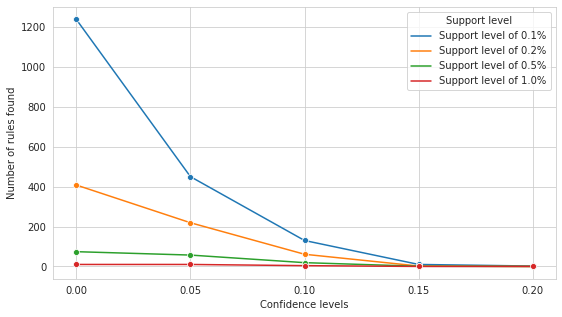

In [173]:
sns.set_style("whitegrid")
test_df = pd.DataFrame({'Confidence levels': conf_levels,
                        'Number of rules found': num_rules,
                        'Support level': support_levels})
plt.figure(figsize=(9, 5))
sns.lineplot(data=test_df, x='Confidence levels', y='Number of rules found', hue='Support level',
             marker='o')
plt.xticks([0, 0.05, 0.1, 0.15, 0.2])

In [165]:
rule_df = association_rules(apriori(trans_df, min_support=0.001, use_colnames=True), 
                          metric="confidence", min_threshold=0.05)
rule_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755
1,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443
2,(UHT-milk),(rolls/buns),0.021386,0.110005,0.001804,0.084375,0.767013,-0.000548,0.972009
3,(UHT-milk),(sausage),0.021386,0.060349,0.001136,0.053125,0.880298,-0.000154,0.992371
4,(UHT-milk),(soda),0.021386,0.097106,0.001270,0.059375,0.611444,-0.000807,0.959887
...,...,...,...,...,...,...,...,...,...
445,"(whole milk, soda)",(sausage),0.011629,0.060349,0.001069,0.091954,1.523708,0.000368,1.034806
446,"(sausage, soda)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,0.000130,1.026642
447,"(yogurt, whole milk)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219
448,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541


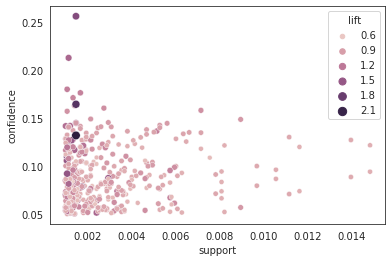

In [166]:
sns.set_style('white')
sns.scatterplot(data=rule_df, x='support', y='confidence', hue='lift', size='lift')

In [167]:
support_df = rule_df.sort_values(by='confidence', ascending=False).head()
support_df.iloc[:, [0, 1, 4, 5, 6]]

,antecedents,consequents,support,confidence,lift
448,"(yogurt, sausage)",(whole milk),0.001470,0.255814,1.619866
436,"(rolls/buns, sausage)",(whole milk),0.001136,0.212500,1.345594
446,"(sausage, soda)",(whole milk),0.001069,0.179775,1.138374
383,(semi-finished bread),(whole milk),0.001671,0.176056,1.114825
441,"(rolls/buns, yogurt)",(whole milk),0.001337,0.170940,1.082428
